<a href="https://colab.research.google.com/github/andrespeedwork/Machine-Learning-Analytics/blob/main/Machine_Learning_e_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
from google.colab import drive #(Preparando o ambiente para criação do MVP Machine Learning & Analytics)
drive.mount('/content/drive'),

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(None,)

In [52]:
# Biblioteca responsável por fazer a leitura e impressão da base de dados
import pandas as pd #(Importando PANDAS e criando alias para facilitar na digitação)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [53]:
# Ler o arquivo csv, especificando o delimitador e o tratamento de erros
df = pd.read_csv('https://raw.githubusercontent.com/andrespeedwork/Machine-Learning-Analytics/refs/heads/main/spam.csv', delimiter=',', on_bad_lines='skip')
# or
# df = pd.read_csv('/content/spam.csv', delimiter=';', on_bad_lines='skip') # if delimiter is ';'

In [54]:
# Exibir as primeiras linhas do DataFrame
print(df.head()) # Mostra as 5 primeiras linhas por padrão e as 5 últimas

                                                                                             v1;v2;;;
ham;Go until jurong point                            crazy.. Available only in bugis n great world...
ham;Ok lar... Joking wif u oni...;;;                                                              NaN
spam;Free entry in 2 a wkly comp to win FA Cup ...                                                NaN
ham;U dun say so early hor... U c already then ...                                                NaN
ham;Nah I don't think he goes to usf                                   he lives around here though;;;


In [55]:
# Resumo estatístico das colunas numéricas
print(df.describe())  # Estatísticas descritivas como média e desvio padrão

                   v1;v2;;;
count                   927
unique                  828
top      I'll call later;;;
freq                     30


In [56]:
# Verificar a dimensão do DataFrame
print(f"Dimensões do dataset: {df.shape}")  # Número de linhas e colunas

Dimensões do dataset: (5198, 1)


In [57]:
# Visualizar se há valores ausentes
print(df.isnull().sum())  # Contagem de valores nulos por coluna

v1;v2;;;    4271
dtype: int64


In [58]:
# Tratar valores ausentes
df = df.dropna()  # Remove linhas com valores nulos (ou use imputação)

In [60]:
# Visualizar o dataset após o tratamento dos valores ausentes
print(df.isnull().sum())  # Contagem de valores nulos por coluna

v1;v2;;;    0
dtype: int64


In [61]:
# Verificar a dimensão do DataFrame
print(f"Dimensões do dataset: {df.shape}")  # Número de linhas e colunas

Dimensões do dataset: (927, 1)


In [62]:
# Carregar o dataset using semicolon as delimiter
df = pd.read_csv('spam.csv', encoding='latin-1', delimiter=';')
# Setting delimiter to ';' to correctly parse the file
df = df[['v1', 'v2']]  # Ajuste para separar rótulos e mensagens
df.columns = ['label', 'text']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})  # Codificação binária

In [63]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['text'])
y = df['label']

In [64]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# Modelo e validação cruzada
model = MultinomialNB()
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')

print(f"F1-Score médio: {scores.mean()}")

F1-Score médio: 0.8920159623763471


In [66]:
# Treinar e testar o modelo
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [67]:
# Treinar KNN com Cross-Validation

#Aqui, usamos a validação cruzada com o modelo KNN para avaliar o desempenho.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Configurar validação cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Começando com k=5
scores = cross_val_score(knn, X, y, cv=cv, scoring='accuracy')

# Resultados
print(f"Acurácias por dobra: {scores}")
print(f"Acurácia média: {scores.mean():.4f}")

Acurácias por dobra: [0.90852018 0.91121076 0.90933573 0.90394973 0.91472172]
Acurácia média: 0.9095


In [68]:
# Relatório final
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.82      0.90       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



In [69]:
# Random Forest Classifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Fazer predições
y_pred_rf = rf.predict(X_test)

# Avaliação
print("Random Forest Classifier")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [70]:
# Logistic Regression

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Fazer predições
y_pred_lr = lr.predict(X_test)

# Avaliação
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))

Logistic Regression
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.63      0.77       150

    accuracy                           0.95      1115
   macro avg       0.96      0.82      0.87      1115
weighted avg       0.95      0.95      0.94      1115



In [71]:
# K-Nearest Neighbors (KNN)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Fazer predições
y_pred_knn = knn.predict(X_test)

# Avaliação
print("K-Nearest Neighbors")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       965
           1       1.00      0.25      0.40       150

    accuracy                           0.90      1115
   macro avg       0.95      0.63      0.67      1115
weighted avg       0.91      0.90      0.87      1115



In [72]:
# Ajuste de Hiperparâmetros

# Para melhorar o desempenho, ajuste os hiperparâmetros dos modelos. Exemplos:

#    Para Random Forest: Ajuste n_estimators, max_depth, etc.
#   Para KNN: Teste diferentes valores para n_neighbors.

# Exemplo com GridSearchCV:

# from sklearn.model_selection import GridSearchCV

# Parâmetros para ajustar no KNN
param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_knn.fit(X_train, y_train)

print("Melhores parâmetros para KNN:", grid_knn.best_params_)

Melhores parâmetros para KNN: {'n_neighbors': 3}


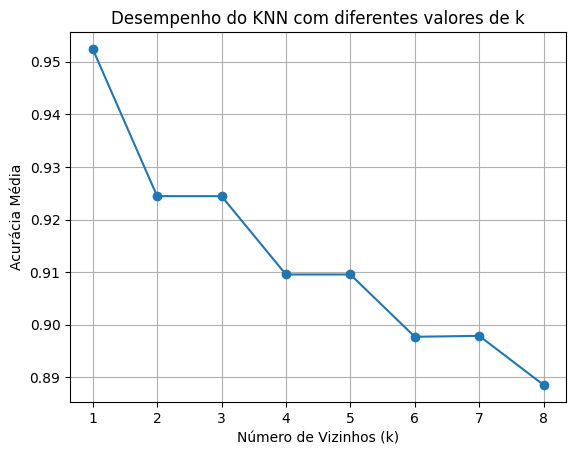

Melhor valor de k: 1


In [73]:
# Ajuste do Número de Vizinhos (k)

# Teste diferentes valores de k para encontrar o melhor.

import matplotlib.pyplot as plt

k_values = range(1, 9)
mean_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=cv, scoring='accuracy')
    mean_scores.append(scores.mean())

# Plotar o desempenho
plt.plot(k_values, mean_scores, marker='o')
plt.xlabel("Número de Vizinhos (k)")
plt.ylabel("Acurácia Média")
plt.title("Desempenho do KNN com diferentes valores de k")
plt.grid()
plt.show()

# Melhor k
best_k = k_values[mean_scores.index(max(mean_scores))]
print(f"Melhor valor de k: {best_k}")

In [74]:
# Treinamento Final com o Melhor k

# Após encontrar o melhor valor de k, treine o modelo novamente e avalie o desempenho.

# Melhor KNN
knn_best = KNeighborsClassifier(n_neighbors=best_k)

# Avaliação com validação cruzada
final_scores = cross_val_score(knn_best, X, y, cv=cv, scoring='accuracy')

print(f"Melhor KNN - Acurácias por dobra: {final_scores}")
print(f"Melhor KNN - Acurácia média: {final_scores.mean():.4f}")

Melhor KNN - Acurácias por dobra: [0.95515695 0.95964126 0.9497307  0.9470377  0.95062837]
Melhor KNN - Acurácia média: 0.9524


In [75]:
# Avaliação no Conjunto de Teste

#Divida os dados em treino e teste para avaliar o modelo no conjunto de teste.

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Separar conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Treinar o modelo com o melhor k
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

# Avaliar desempenho
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[966   0]
 [ 56  93]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       966
           1       1.00      0.62      0.77       149

    accuracy                           0.95      1115
   macro avg       0.97      0.81      0.87      1115
weighted avg       0.95      0.95      0.94      1115



**XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX** Checklist sugerido: